
<h1 style ="font-size:60px;color:orange;text-align: center;"> <u>Economic Data Analysis</u> </h1>                                     <h1 style ="font-size:30px;color:Blue;text-align: center;"><u> Using </u> </h1> 
<img src= "https://fred.stlouisfed.org/images/fred-logo-2x.png">

##   __Impact of Economic data on S&P 500__
###  I have analysed  seven economic indicator as a proxy to analyse S&P 500
      1. Inflation Data
      2. Interest Rates
      3. Crude Oil prices
      4. Metal Index
      5. Unemployment Data
      6. Dollar Index
      7. Bond Yield Index

In [26]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import time

In [7]:
import plotly as px

In [8]:
plt.style.use('fivethirtyeight')

In [10]:
pip install fredapi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
from fredapi import Fred

In [32]:
pd.set_option('display.max_columns',50)

In [33]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [34]:
fred_key = 'd2b6646b4a2afee637d697a8f44df47b'

<h2  style="color:Blue" > Create the Fred Object</h2>

In [37]:
fred = Fred(api_key=fred_key)

<h3  style="color:Blue" >1. Pull Economic Data </h3>

In [38]:
sp_search = fred.search('S&P', order_by='popularity')

In [40]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-11-22,2022-11-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-11-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-21 08:05:10-06:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-11-22,2022-11-22,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-11-22,2022-11-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-11-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-21 08:05:14-06:00,85,This data represents the effective yield of th...
SP500,SP500,2022-11-22,2022-11-22,S&P 500,2012-11-23,2022-11-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-21 19:10:57-06:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-11-22,2022-11-22,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


<h3  style="color:Blue" >2. Economic Data - S&P500 </h3>

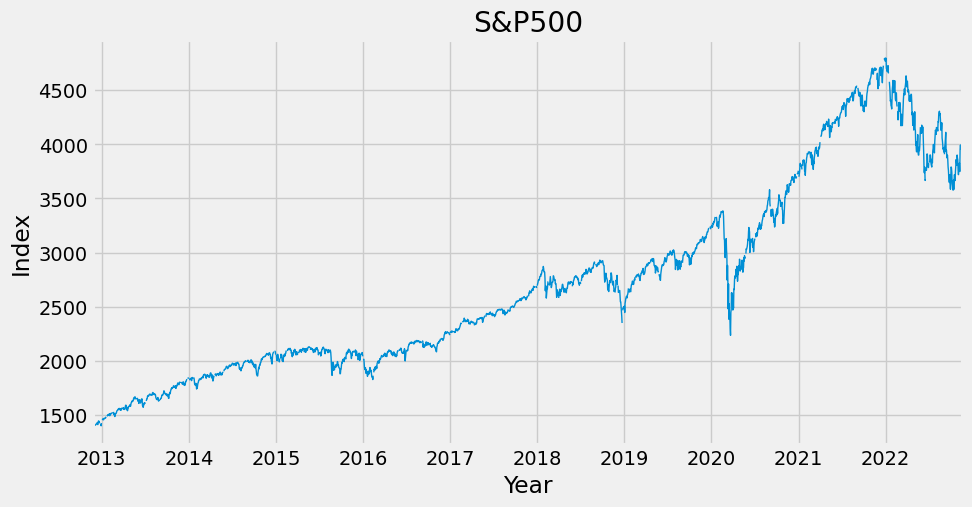

In [101]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(10,5), title='S&P500', lw=1)
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

<h3  style="color:Blue" >3. Economic Data - Unemployment </h3>

In [50]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [51]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-22,2022-11-22,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:03-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-11-22,2022-11-22,Unemployment Rate - Black or African American,1972-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:13-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2022-11-22,2022-11-22,Unemployment Rate in California,1976-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-18 12:17:13-06:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2022-11-22,2022-11-22,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2022-11-22,2022-11-22,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,21,Series Is Presented Here As Three Variables--(...


In [52]:
unrate = fred.get_series('UNRATE')

In [88]:
unrate.columns=['Date', 'percentage']

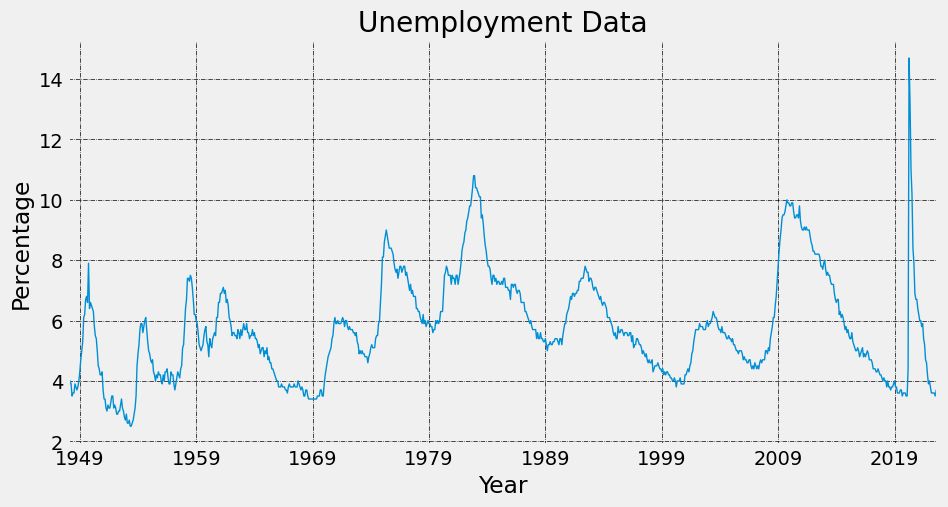

In [104]:
unrate.plot(figsize=(10,5), title='Unemployment Data', lw=1)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)


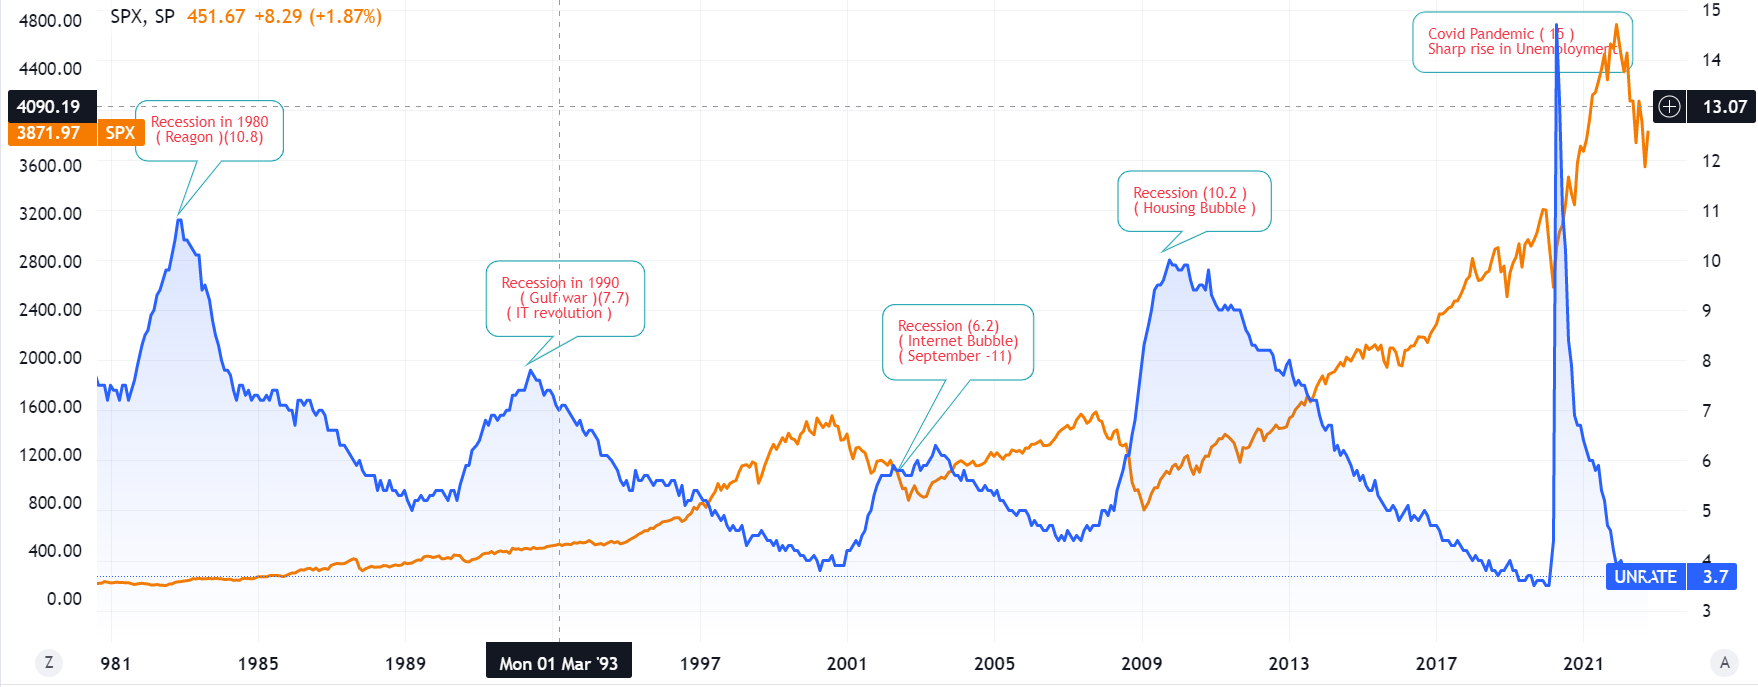

##### The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older

##### Observations:  
       -Correlation : Inverse or Negative correlation
       -Lowest unemployment rate :  3.7 percent
       -Highest Unemployment rate : 15 Percent
       Senarios:
       -1980 recession (High Inflation)(Unemployment)
       -1990 recession ( Gulf War ) after that we had IT revolution
       -2000 recession ( Internet Bubble ) ( september -11)
       -2007 recession (Liquidity , credit and Housing Bubble )
       -2020 Covid pandamic

<h3  style="color:Blue" >4. Economic Data - Inflation </h3>

In [123]:
inflation_df = fred.search('inflation data', filter=('frequency','Monthly'))

In [149]:
inflation_df.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
REAINTRATREARAT10Y,REAINTRATREARAT10Y,2022-11-23,2022-11-23,10-Year Real Interest Rate,1982-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-14 14:13:03-06:00,71,The Federal Reserve Bank of Cleveland estimate...
EXPINF1YR,EXPINF1YR,2022-11-23,2022-11-23,1-Year Expected Inflation,1982-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-14 14:13:04-06:00,62,The Federal Reserve Bank of Cleveland estimate...
REAINTRATREARAT1YE,REAINTRATREARAT1YE,2022-11-23,2022-11-23,1-Year Real Interest Rate,1982-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-14 14:13:05-06:00,61,The Federal Reserve Bank of Cleveland estimate...
EXPINF2YR,EXPINF2YR,2022-11-23,2022-11-23,2-Year Expected Inflation,1982-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-14 14:13:06-06:00,58,The Federal Reserve Bank of Cleveland estimate...
EXPINF10YR,EXPINF10YR,2022-11-23,2022-11-23,10-Year Expected Inflation,1982-01-01,2022-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-14 14:13:06-06:00,56,The Federal Reserve Bank of Cleveland estimate...


In [120]:
inflation = fred.get_series('PCETRIM6M680SFRBDAL')

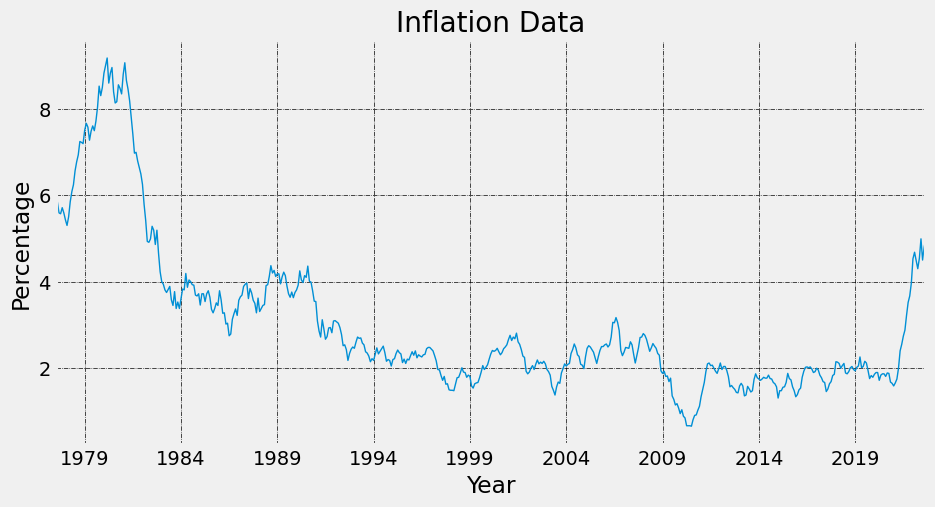

In [121]:
inflation.plot(figsize=(10,5), title='Inflation Data', lw=1)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

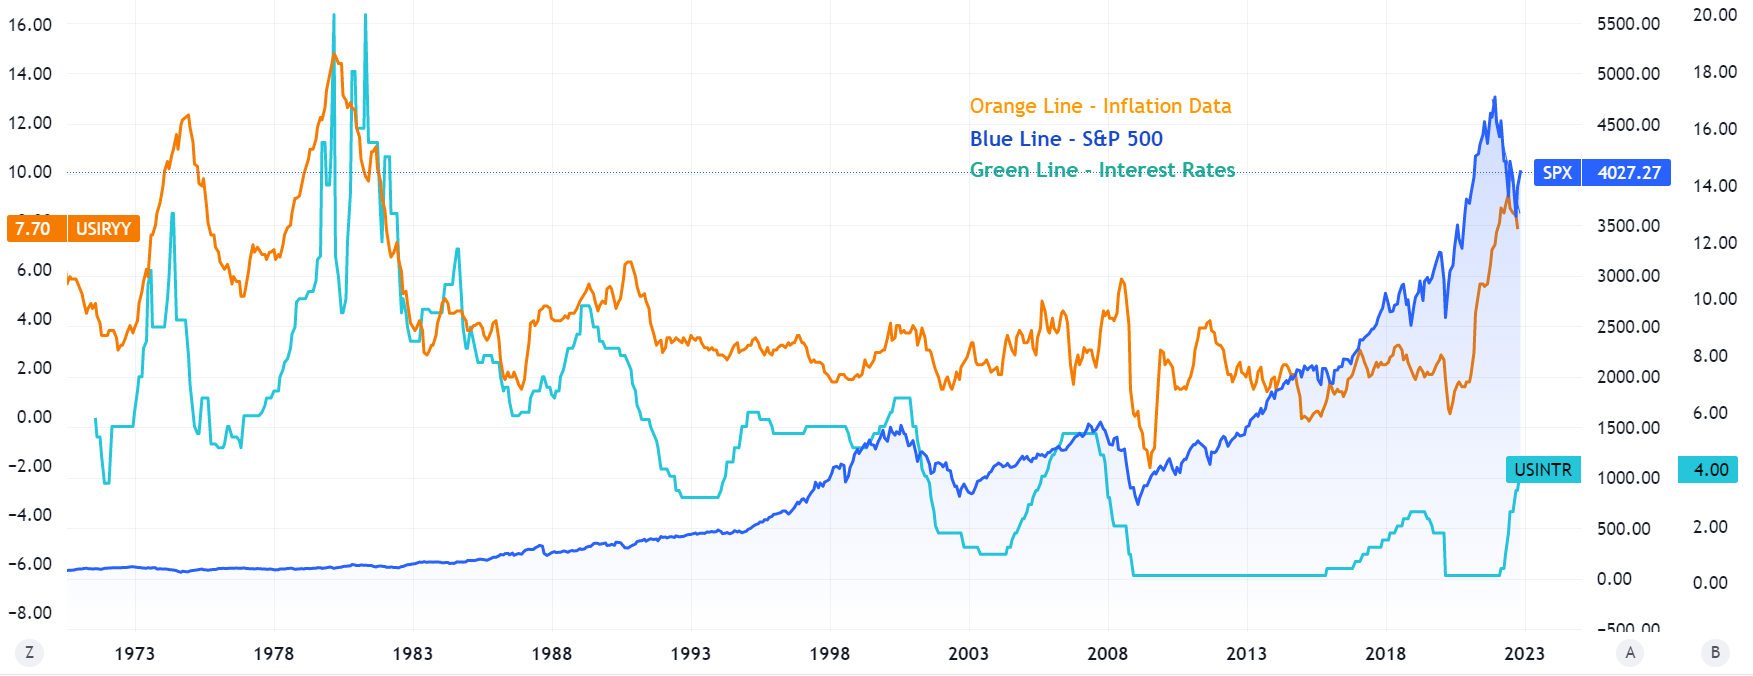

#### Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals

#### Observation:       
       -Correlation : Inverse or Negative correlation
       - Current Inflation - 7.7%
       -Lowest Inflation data :  - 2.1 percent
       -Highest Inflation data : 15 Percent
        Senarios:
       -1980 recession (High Inflation)(Unemployment)
       -1990 recession ( Gulf War ) after that we had IT revolution
       -2000 recession ( Internet Bubble ) ( september -11)
       -2007 recession (Liquidity , credit and Housing Bubble )
       -2020 Covid pandamic

<h3  style="color:Blue" >5. Economic Data - Interest Rate </h3>

In [126]:
interestrate_df = fred.search('interest rate', filter=('frequency','Monthly'))

In [150]:
interestrate_df.head(4)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDFUNDS,FEDFUNDS,2022-11-23,2022-11-23,Federal Funds Effective Rate,1954-07-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 15:18:02-05:00,97,Averages of daily figures. For additional hi...
T10Y2YM,T10Y2YM,2022-11-23,2022-11-23,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:02-05:00,56,Series is calculated as the spread between 10-...
T10Y3MM,T10Y3MM,2022-11-23,2022-11-23,10-Year Treasury Constant Maturity Minus 3-Mon...,1982-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:04-05:00,48,Series is calculated as the spread between 10-...
GS10,GS10,2022-11-23,2022-11-23,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 15:17:04-05:00,72,Averages of business days. For further informa...


In [128]:
interestrate = fred.get_series('FEDFUNDS')            

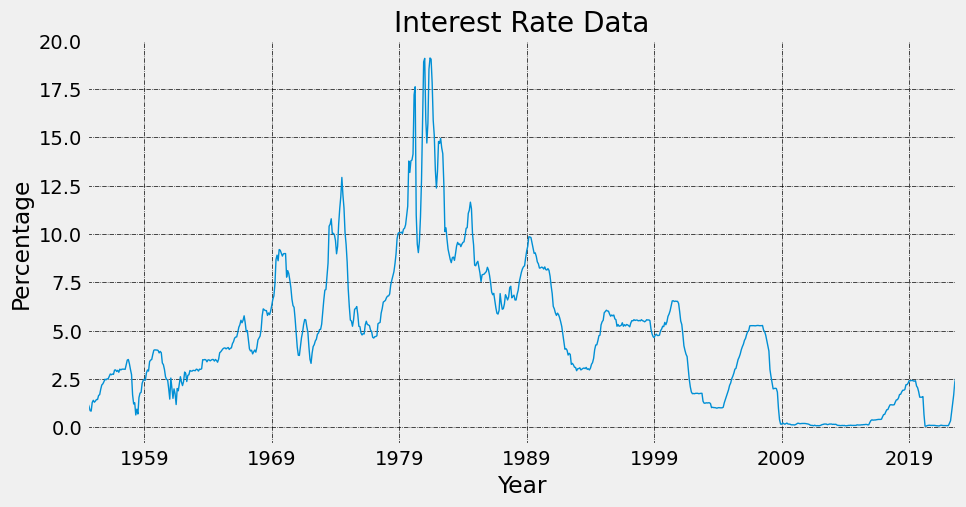

In [151]:
interestrate.plot(figsize=(10,5), title='Interest Rate Data', lw=1)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

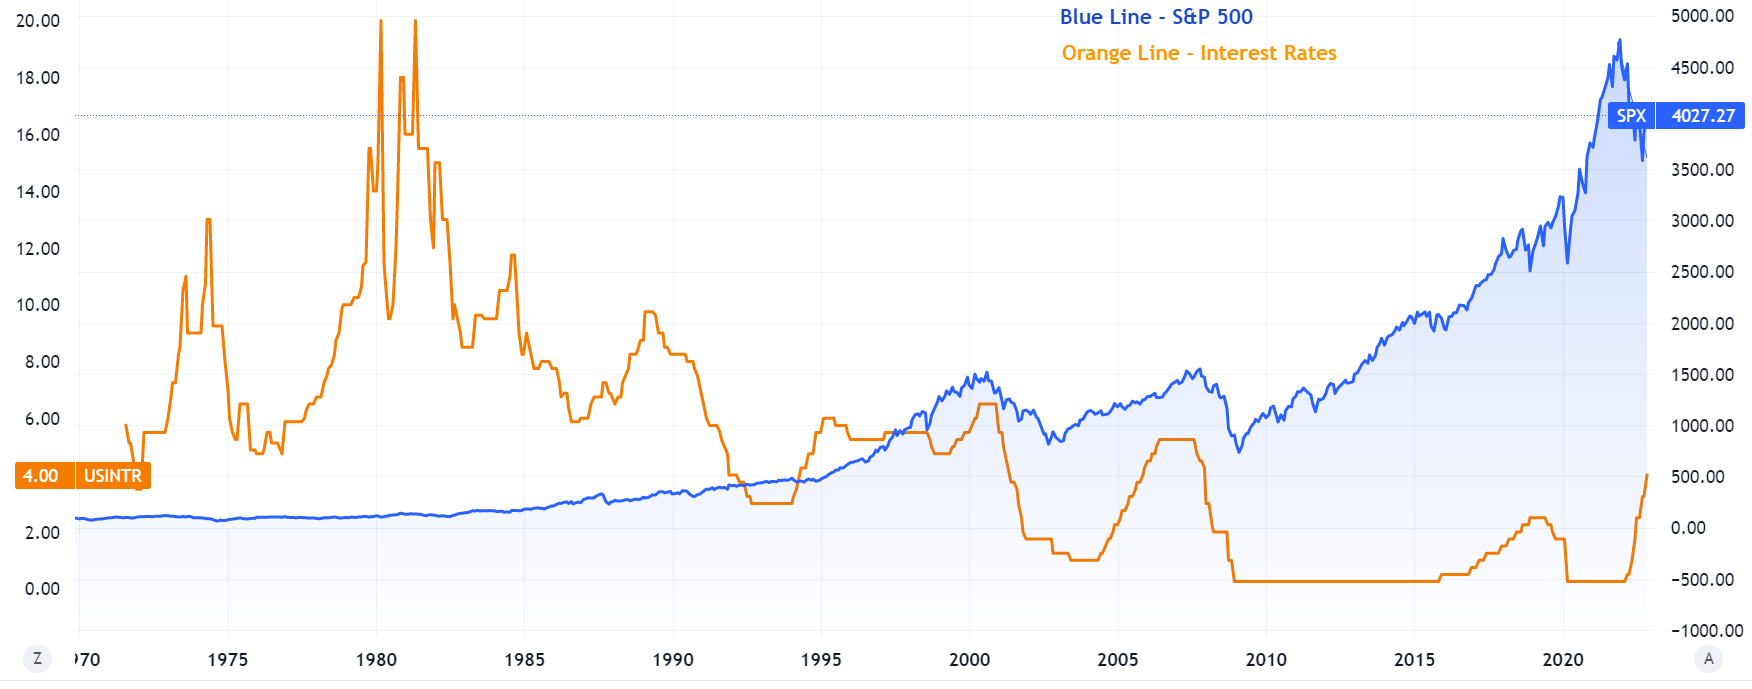

#### The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances.
#### Observation:       
        Correlation : Inverse or Negative correlation - where Inflation and Growth are the leading indicators
           Current Inflation - 4 %
           Lowest Interest Rate :  0.25 percent
           Highest Interest Rate : 15 to 20 Percent
            Senarios:
           1980 recession (High Inflation)(Unemployment)
           1990 recession ( Gulf War ) after that we had IT revolution
           2000 recession ( Internet Bubble ) ( september -11)
           2007 recession (Liquidity , credit and Housing Bubble )
           2020 Covid pandamic

<h3  style="color:Blue" >6. Economic Data - Dollar Index </h3>

In [130]:
Dxy_df = fred.search('dollar index', filter=('frequency','Monthly'))

In [131]:
Dxy_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
TWEXBGSMTH,TWEXBGSMTH,2022-11-23,2022-11-23,Nominal Broad U.S. Dollar Index,2006-01-01,2022-10-01,Monthly,M,Index Jan 2006=100,Index Jan 2006=100,Not Seasonally Adjusted,NSA,2022-11-07 15:20:04-06:00,48,None
CUUR0000SA0R,CUUR0000SA0R,2022-11-23,2022-11-23,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2022-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2022-11-10 07:37:06-06:00,68,None
TWEXAFEGSMTH,TWEXAFEGSMTH,2022-11-23,2022-11-23,Nominal Advanced Foreign Economies U.S. Dollar...,2006-01-01,2022-10-01,Monthly,M,Index Jan 2006=100,Index Jan 2006=100,Not Seasonally Adjusted,NSA,2022-11-07 15:20:05-06:00,32,None
RTWEXBGS,RTWEXBGS,2022-11-23,2022-11-23,Real Broad Dollar Index,2006-01-01,2022-10-01,Monthly,M,Index Jan 2006=100,Index Jan 2006=100,Not Seasonally Adjusted,NSA,2022-11-01 15:19:01-05:00,57,For more information about trade-weighted inde...
RBUSBIS,RBUSBIS,2022-11-23,2022-11-23,Real Broad Effective Exchange Rate for United ...,1994-01-01,2022-10-01,Monthly,M,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-11-17 11:01:02-06:00,59,Real effective exchange rates are calculated a...


In [132]:
dollarindex = fred.get_series('RBUSBIS')

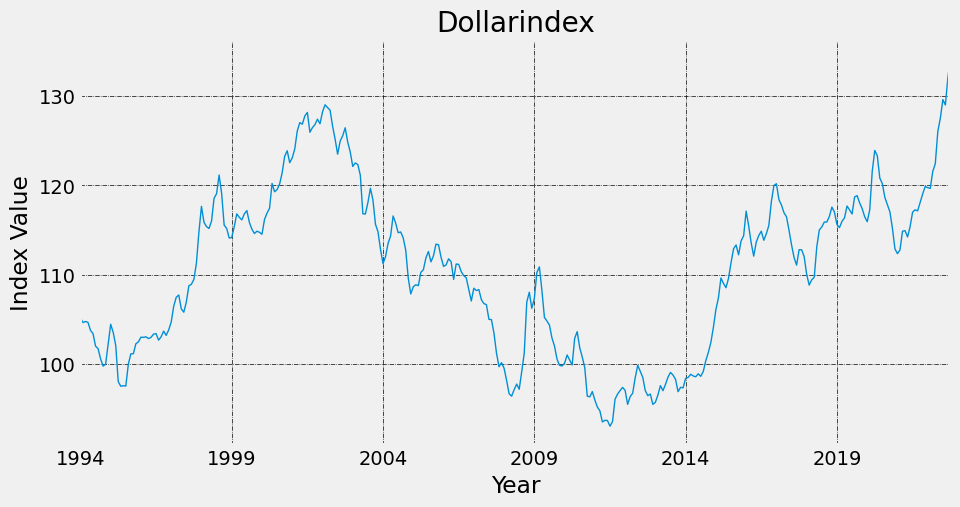

In [134]:
dollarindex.plot(figsize=(10,5), title='Dollarindex', lw=1)
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

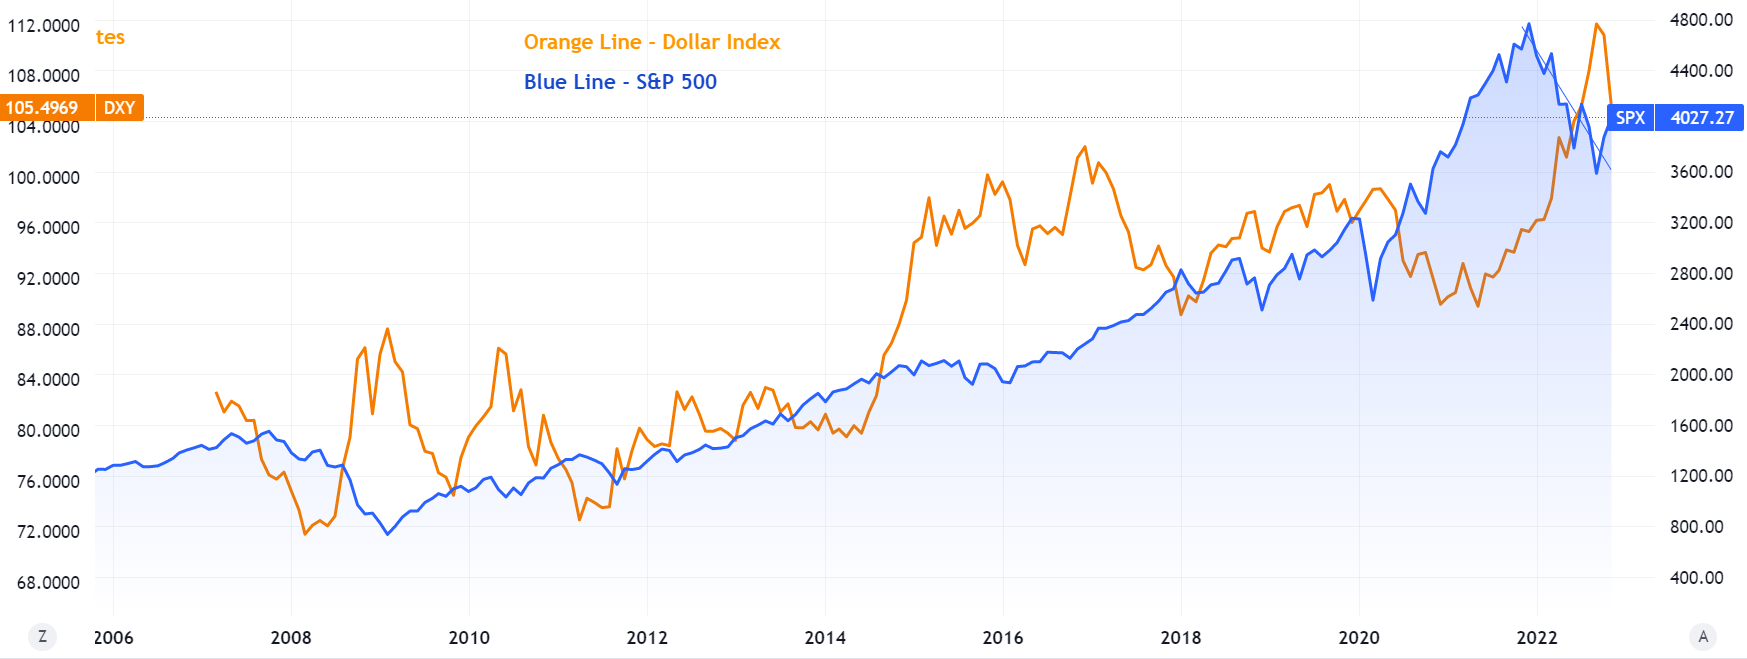

#### Dollar Index is a currency index that tracks the strength of the US Dollar against a basket of the four most liquid currencies in the world. 
#### Observation:
    Correlation : Inverse or Negative correlation - Movement depends on the US dollar demand and Trade balance
       Current Dollar Index value - 105
       Lowest Dollar Index value :   72
       Highest Dollar Index value : 112
        Senarios:
       1980 recession (High Inflation)(Unemployment)
       1990 recession ( Gulf War ) after that we had IT revolution
       2000 recession ( Internet Bubble ) ( september -11)
       2007 recession (Liquidity , credit and Housing Bubble )
       2020 Covid pandamic

<h3  style="color:Blue" >7. Economic Data - Crude Oil </h3>

In [136]:
Crude_df = fred.search('crude', filter=('frequency','Monthly'))

In [137]:
Crude_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
MCOILWTICO,MCOILWTICO,2022-11-23,2022-11-23,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-01,2022-10-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2022-11-02 12:16:02-05:00,58,"Definitions, Sources and Explanatory Notes: ht..."
MCOILBRENTEU,MCOILBRENTEU,2022-11-23,2022-11-23,Crude Oil Prices: Brent - Europe,1987-05-01,2022-10-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2022-11-09 12:06:05-06:00,63,"Definitions, Sources and Explanatory Notes: ht..."
WTISPLC,WTISPLC,2022-11-23,2022-11-23,Spot Crude Oil Price: West Texas Intermediate ...,1946-01-01,2022-10-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2022-11-02 12:31:02-05:00,66,This series was created by the Federal Reserve...
POILBREUSDM,POILBREUSDM,2022-11-23,2022-11-23,Global price of Brent Crude,1990-01-01,2022-10-01,Monthly,M,U.S. Dollars per Barrel,U.S. $ per Barrel,Not Seasonally Adjusted,NSA,2022-11-23 15:25:02-06:00,58,Value represents the benchmark prices which ar...
POILWTIUSDM,POILWTIUSDM,2022-11-23,2022-11-23,Global price of WTI Crude,1990-01-01,2022-10-01,Monthly,M,U.S. Dollars per Barrel,U.S. $ per Barrel,Not Seasonally Adjusted,NSA,2022-11-23 15:25:03-06:00,51,Value represents the benchmark prices which ar...


In [138]:
CrudeOil = fred.get_series('WTISPLC')   

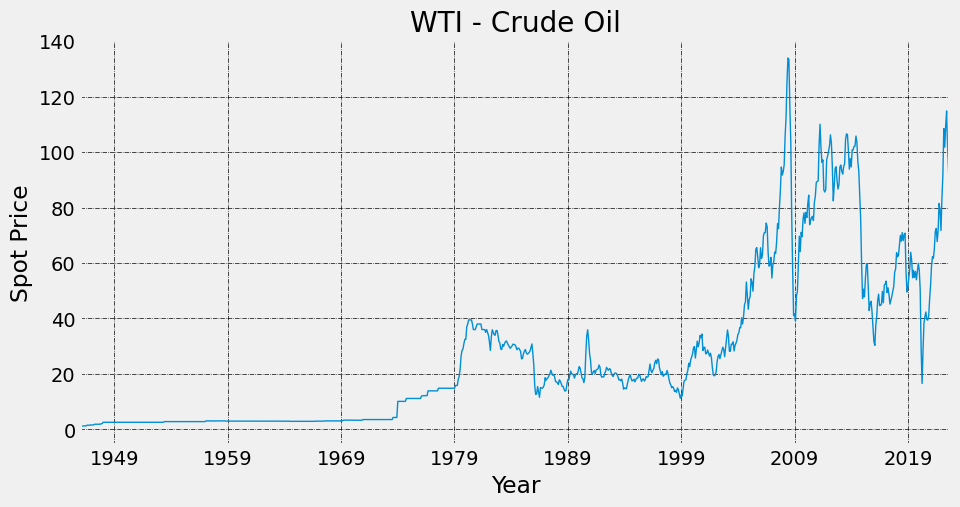

In [139]:
CrudeOil.plot(figsize=(10,5), title='WTI - Crude Oil', lw=1)
plt.xlabel('Year')
plt.ylabel('Spot Price')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

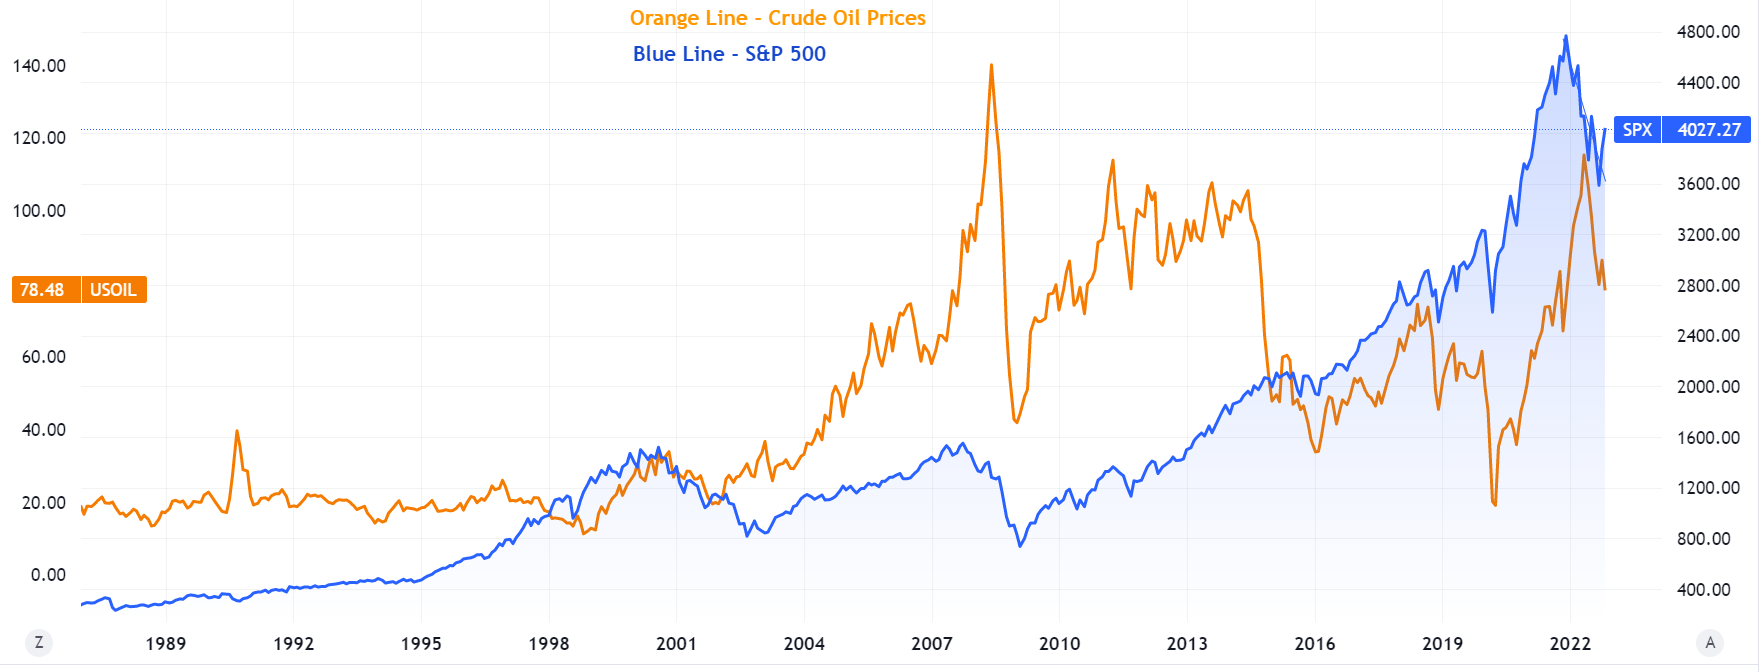

#### Crude Oil has  a positive corelation with S&P500
    Increase in prices can be because of :
    - Increase in consumption by manufacturing companies
    - Less production by OPEC countries
    - War or Natural calamities
    Decrese in prices can be because of:
    - Decrease in consumption ( Recession in economy)
    - Excess production and Supply
    
 Note:  Any time Crude crossing more than 100 has led to sharp correction crude prices.
 
#### Companies and economy depending on Crude Oil, will have inverse correlation in prices    
    

<h3  style="color:Blue" >8. Economic Data - Bond Yields </h3>

In [140]:
BondYields_df = fred.search('Bond Yield', filter=('frequency','Monthly'))

In [141]:
BondYields_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
AAA,AAA,2022-11-23,2022-11-23,Moody's Seasoned Aaa Corporate Bond Yield,1919-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 10:16:02-05:00,80,These instruments are based on bonds with matu...
BAA,BAA,2022-11-23,2022-11-23,Moody's Seasoned Baa Corporate Bond Yield,1919-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 10:16:04-05:00,69,These instruments are based on bonds with matu...
BAA10YM,BAA10YM,2022-11-23,2022-11-23,Moody's Seasoned Baa Corporate Bond Yield Rela...,1953-04-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:05-05:00,39,Series is calculated as the spread between Moo...
IRLTLT01USM156N,IRLTLT01USM156N,2022-11-23,2022-11-23,Long-Term Government Bond Yields: 10-year: Mai...,1960-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-14 14:25:03-06:00,70,OECD descriptor ID: IRLTLT01 OECD unit ID: ST ...
AAA10YM,AAA10YM,2022-11-23,2022-11-23,Moody's Seasoned Aaa Corporate Bond Yield Rela...,1953-04-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:08-05:00,23,Series is calculated as the spread between Moo...


In [142]:
 CorporateBondYields = fred.get_series('AAA') 

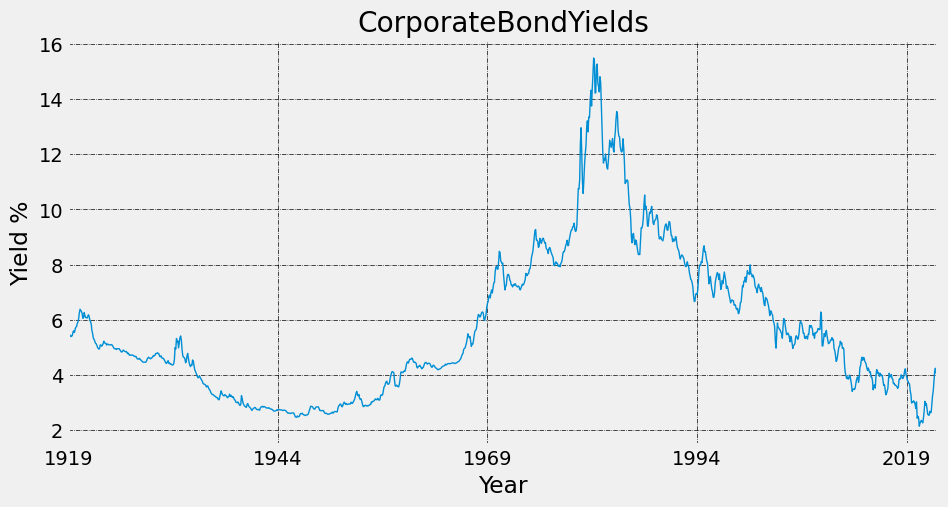

In [143]:
CorporateBondYields.plot(figsize=(10,5), title='CorporateBondYields', lw=1)
plt.xlabel('Year')
plt.ylabel('Yield %')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

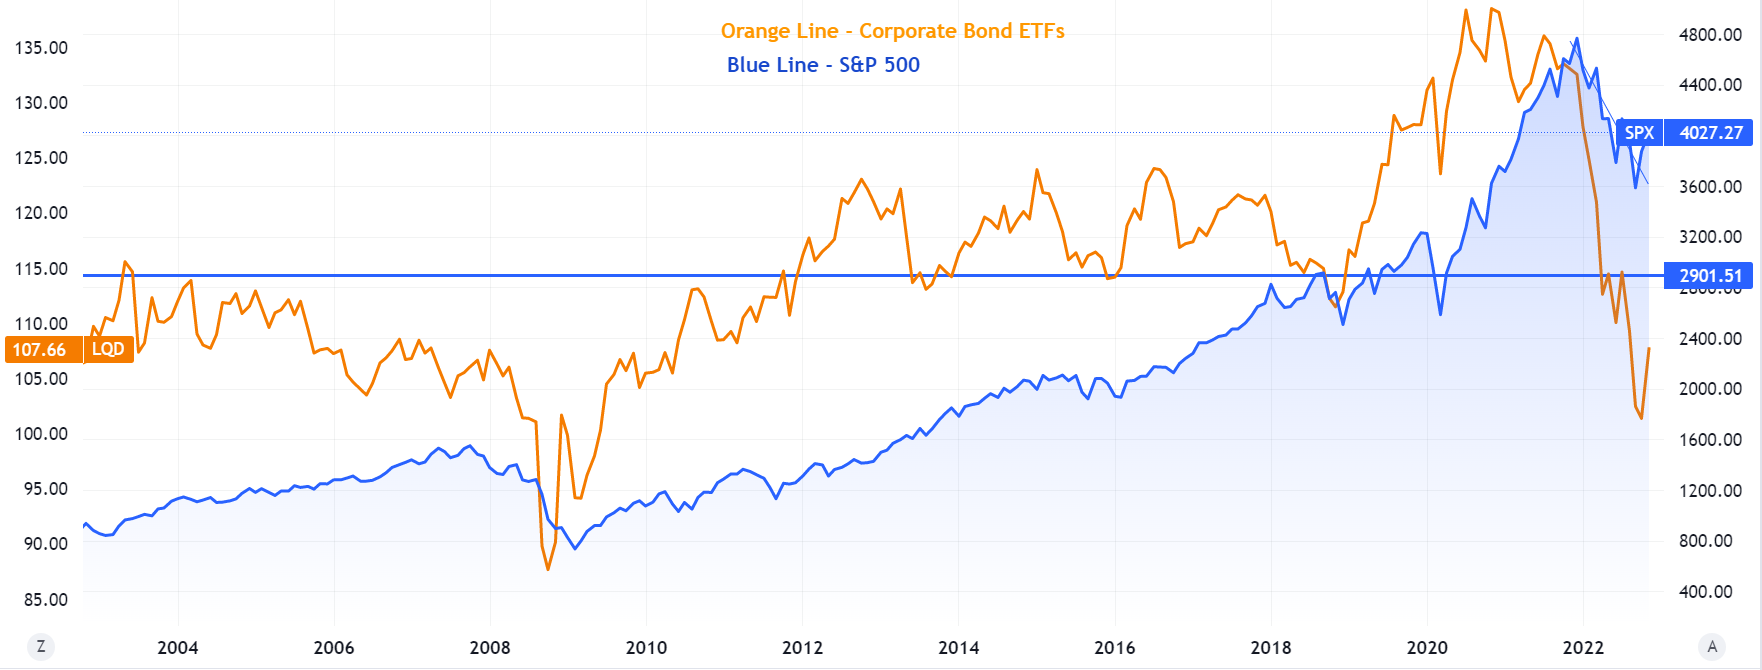

##### Bond Prices  and Interest rates have inverse relationship
##### Corporated Bonds having Mean reversion @ 114  and S&P500 @ 2900

<h3  style="color:Blue" >9. Economic Data: Metal Index </h3>

In [145]:
MetalIndex_df = fred.search('Metal Index', filter=('frequency','Monthly'))

In [146]:
MetalIndex_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
WPU101707,WPU101707,2022-11-23,2022-11-23,Producer Price Index by Commodity: Metals and ...,1982-06-01,2022-10-01,Monthly,M,Index Jun 1982=100,Index Jun 1982=100,Not Seasonally Adjusted,NSA,2022-11-15 07:51:02-06:00,75,None
WPS101707,WPS101707,2022-11-23,2022-11-23,Producer Price Index by Commodity: Metals and ...,2008-01-01,2010-12-01,Monthly,M,Index Jun 1982=100,Index Jun 1982=100,Seasonally Adjusted,SA,2016-02-17 11:47:10-06:00,42,None
WPU10170502,WPU10170502,2022-11-23,2022-11-23,Producer Price Index by Commodity: Metals and ...,2010-12-01,2022-10-01,Monthly,M,Index Dec 2010=100,Index Dec 2010=100,Not Seasonally Adjusted,NSA,2022-11-15 07:51:02-06:00,71,None
WPU101,WPU101,2022-11-23,2022-11-23,Producer Price Index by Commodity: Metals and ...,1926-01-01,2022-10-01,Monthly,M,Index 1982=100,Index 1982=100,Not Seasonally Adjusted,NSA,2022-11-15 07:51:02-06:00,67,None
WPS101,WPS101,2022-11-23,2022-11-23,Producer Price Index by Commodity: Metals and ...,1967-01-01,2022-10-01,Monthly,M,Index 1982=100,Index 1982=100,Seasonally Adjusted,SA,2022-11-15 07:53:05-06:00,43,None


In [147]:
 MetalIndex = fred.get_series('WPU101')    

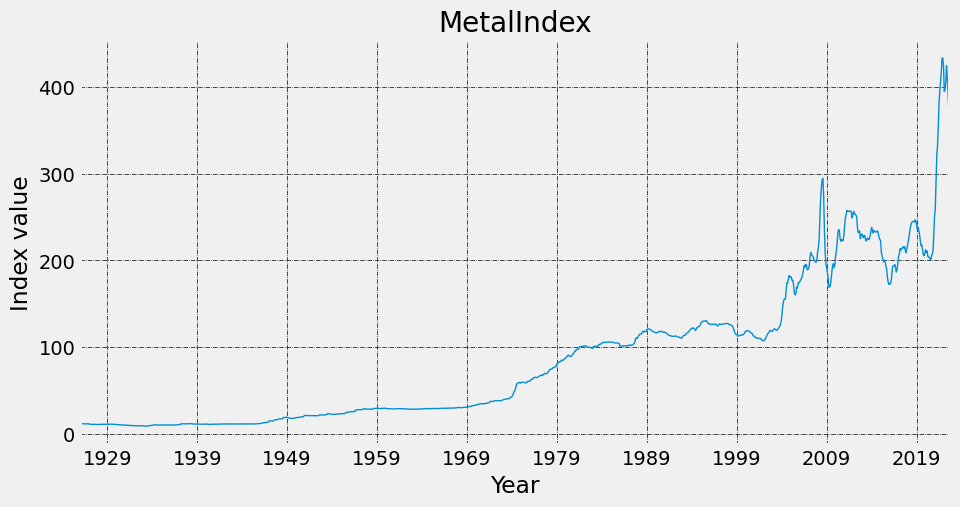

In [148]:
MetalIndex.plot(figsize=(10,5), title='MetalIndex', lw=1)
plt.xlabel('Year')
plt.ylabel('Index value')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

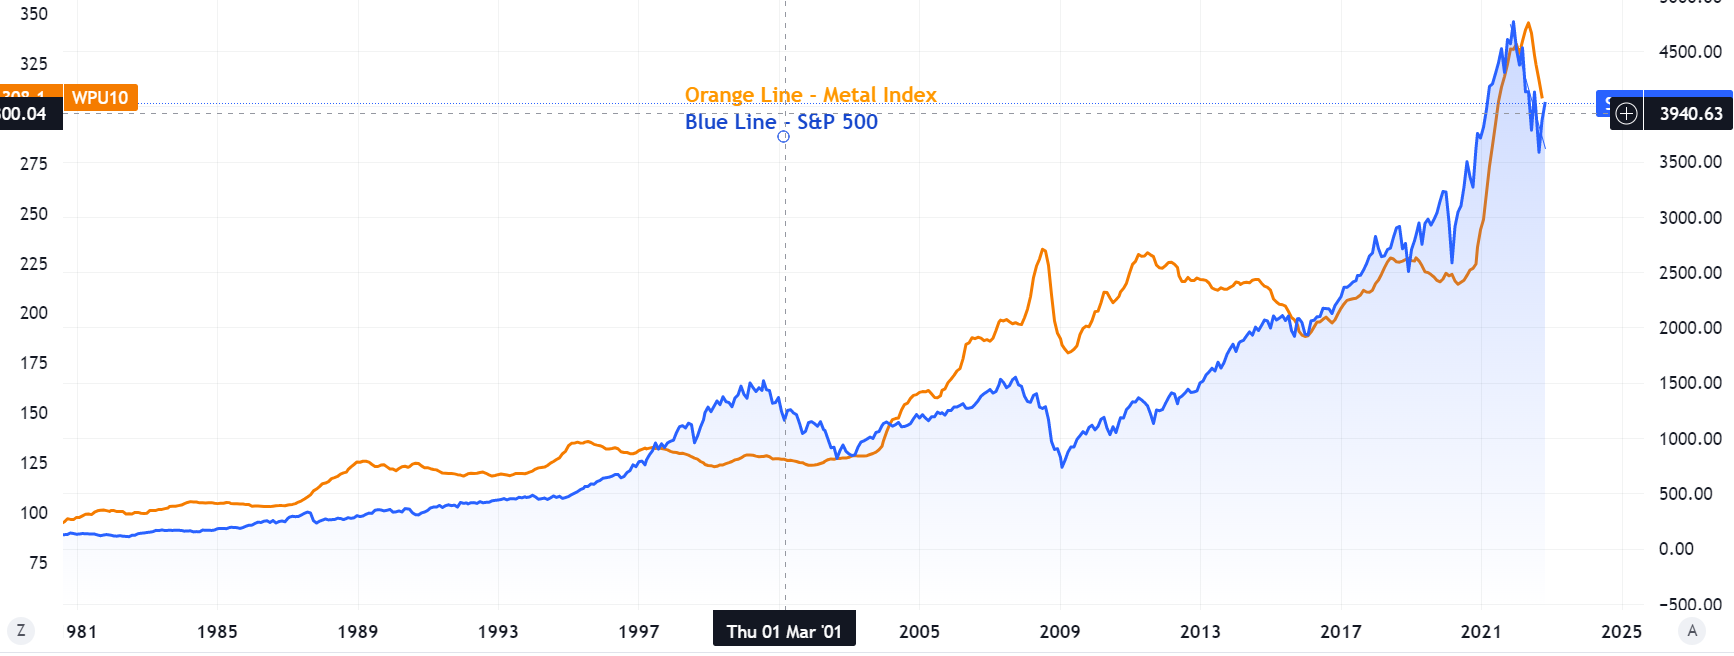